Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

**Esra** ()

----
# Project keywords
Interpolation, least squares, optimization, nonlinear least squares

----
# Project description
In this assignment,  we will explore methods for data fitting and interpolation. Given a dataset of some quantity at different moments in time, such methods can be used to predict future values as well as to compute values at past times where we do not have observations.

Consider the following data set for Arctic sea ice minimum, an important climate signal. Arctic sea ice extent reaches a minimum every year in September. The data, obtained from NASA (see
https://climate.nasa.gov/vital-signs/arctic-sea-ice/), shows the minimum sea ice extent reached in different years. 
In the table, $t$ denotes the year, $s$ denotes the sea ice extent in million square kilometers.

The aim of this project is to explore various ways of fitting functions to this dataset, and see how well they perform and how robust they are.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
ice_times = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 5.31, 3.40, 4.59, 4.30], dtype=np.float64)

----
# Project exercises
## Exercise 1
Read sections 7.1 - 7.3 from the book by Heath.

## Exercise 2
For constructing a polynomial interpolating function through the data, consider the following possible sets of basis functions: (a) the set $\phi_j(t)=t^{j-1}$ (these are the regular monomials), (b) the set $\phi_j(t)=(t-1978)^{j-1}$, (c) the set $\phi_j(t)=((t-1998)/18)^{j-1}$. The index $j$ runs from 1 to $J$.

What should be the value of $J$? For each of the sets of basis functions (a), (b), (c), compute the corresponding Vandermonde matrix. How do their condition numbers compare?

The values of J should run from 1 to length(input) where the input is the dates data.

In [21]:
phi1 = np.ones((len(ice_times),len(ice_times)))
phi2 = np.ones((len(ice_times),len(ice_times)))
phi3 = np.ones((len(ice_times),len(ice_times)))

for i in range(0, len(ice_times)):
    for j in range(0, len(ice_times)):
        phi1[i][j] = ice_times[i]**j
        phi2[i][j] = (ice_times[i] - 1978)**j 
        phi3[i][j] = ((ice_times[i] - 1998)/18)**j 
        
print("Condition number of basis (a) is: ", np.linalg.cond(phi1))
print("Condition number of basis (b) is: ", np.linalg.cond(phi2))
print("Condition number of basis (c) is: ", np.linalg.cond(phi3))

Condition number of regular monomials is:  3.194924664236181e+56
Condition number of regular monomials is:  1.8804337829595864e+21
Condition number of regular monomials is:  225102.97749707714


The condition number of basis (c) is much better conditioned than that of condition (a) or (b).  Though (c) is still not very well condtioned as we would prefer it to be closer to 1.

## Exercise 3
Use the set of basis functions with the best conditioning and compute the interpolating function through the data in the table above. Show the coefficients of the interpolating function in a table. Plot the data points and the interpolating function in a single figure. Discuss the results.

What values does this interpolating function predict for $t=1984$? What values for $t=2017$ and $t=2018$? Check the NASA website mentioned in the introduction to see how good these predictions are.

(2, 25)

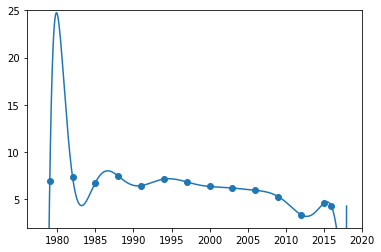

In [59]:
def make_matrix(time_list):
    phi3 = np.ones((len(time_list),len(solution)))
    for i in range(0, len(time_list)-1):
        for j in range(0, phi3.shape[1]):
            phi3[i][j] = ((time_list[i] - 1998)/18)**j 
    return phi3
    
time_steps = np.linspace(1978, 2018, 1000)

#print(solution.size)

A = make_matrix(time_steps)

iceicearea = A.dot(solution)

#solution = np.linalg.solve(phi3, ice_areas)

plt.scatter(ice_times, ice_areas)
plt.plot(time_steps, iceicearea)
plt.ylim(2, 25)

In [ ]:
# Natashjas code

print(solution)

def solve(time_step):
    x = ((time_step-1998)/18)
    
    y = (solution[0] * x**13) + (solution[1] * x**12) + (solution[2] * x**11) + (solution[3] * x**10) + (solution[4] * x**9) + (solution[5] * x**8) + (solution[6] * x**7) + (solution[7] * x**6) + (solution[8] * x**5) + (solution[9] * x**4) + (solution[10] * x**3) + (solution[11] * x**2) + (solution[12] * x**1) + (solution[13])
    
    return y

area = []

for time_step in time_steps:
    area.append(solve(time_step))

## Exercise 4
How sensitive are the results to small changes in the data? To assess this, add (modest) random perturbations to the $s$ values in the dataset and recompute the interpolating function. Plot the new interpolating function together with the old one, and compare them. Also, use the new function to predict values for $t=1984$, $t=2016$ and $t=2017$, and compare these to the predictions you made before.

## Exercise 5
As an alternative to interpolation, one can use minimization (e.g. linear least squares) to fit a function to the data. Use linear least squares to fit a low-degree (e.g., quadratic or cubic) polynomial to the data in the table. Plot the resulting function together with the data. Make predictions for values at $t=1984$, $t=2017$ and $t=2018$. Compare the results to the results obtained before with interpolation.

Explore the sensitivity of the least squares fit to changes in the data, in the same way as before.

## Exercise 6

Fitting a function using linear least squares can be sensitive to "outliers" in the data. As an example, create a single outlier by changing the data point for $t=2009$ from $s=5.31$ to $s=7.31$. Repeat the linear least squares fitting procedure. Discuss your results.

## Exercise 7
There may be more suitable functions to fit to these data than a polynomial. For example, predictions using a polynomial may give negative values, which would be unphysical. Can you think of a suitable function, and fit it to the data? What predictions does it give? If the function is nonlinear in its parameters, fitting it by least squares will give a _nonlinear least squares_ problem (see section 6.6 in the book by Heath). 